# Predicting heart disease using machine learning

this notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine-learning model capable of predicting whether or not someone has a heart diseses or not on their medical attriutes.

we are going to folloew the following approach:
1. Problem defination
2. data
3. evaluation
4. features
5. Modelling
6. experimentations

## 1. Problem Defination

in a statement,

> Given a clinical parameters about a patient, can we predict whether or not they have heart disease or not

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation
> if we can reach 95% accuracy whether or not a person has heart disease during the proof of the concept, we will pursue the project.

## 4. Features

### Data Dictionary

1. **age** - Age in years
2. **sex** - (1 = male; 0 = female)
3. **cp** - Chest pain type
    - 0: Typical angina - chest pain related to decreased blood supply to the heart
    - 1: Atypical angina - chest pain not related to the heart
    - 2: Non-anginal pain - typically esophageal spasms (non-heart related)
    - 3: Asymptomatic - chest pain not showing signs of disease
4. **trestbps** - Resting blood pressure (in mm Hg on admission to the hospital); anything above 130-140 is typically cause for concern
5. **chol** - Serum cholesterol in mg/dl
    - serum = LDL + HDL + 0.2 * triglycerides
    - Levels above 200 mg/dl are cause for concern
6. **fbs** - (Fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - Levels '>126' mg/dl signal diabetes
7. **restecg** - Resting electrocardiographic results
    - 0: Nothing to note
    - 1: ST-T Wave abnormality (can range from mild symptoms to severe problems, signals non-normal heart beat)
    - 2: Possible or definite left ventricular hypertrophy (enlarged heart's main pumping chamber)
8. **thalach** - Maximum heart rate achieved
9. **exang** - Exercise-induced angina (1 = yes; 0 = no)
10. **oldpeak** - ST depression induced by exercise relative to rest; looks at stress of heart during exercise (unhealthy heart will stress more)
11. **slope** - The slope of the peak exercise ST segment
    - 0: Upsloping - better heart rate with exercise (uncommon)
    - 1: Flat sloping - minimal change (typical healthy heart)
    - 2: Downsloping - signs of an unhealthy heart
12. **ca** - Number of major vessels (0-3) colored by fluoroscopy
    - Colored vessel means the doctor can see the blood passing through; the more blood movement the better (no clots)
13. **thal** - Thalium stress result
    - 1, 3: Normal
    - 6: Fixed defect (used to be a defect but is okay now)
    - 7: Reversible defect (no proper blood movement when exercising)
14. **target** - Presence of heart disease (1 = yes, 0 = no) (the predicted attribute)
s, 0=no) (= the predicted attribute)


## reparing the tools



In [130]:
# import all the tools we need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#we want our plots to apppear inside the notebooks
%matplotlib inline 

#models from sk learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load the data

In [131]:
df= pd.read_csv("heart-disease.csv")
df.shape # (rows,column)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the
dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [132]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [133]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [134]:
# let's find out how many of each class there 
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

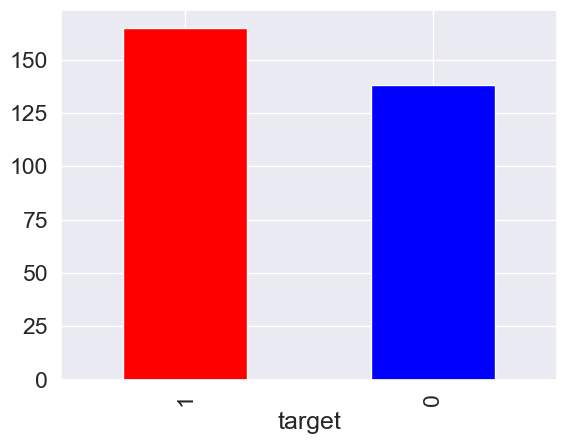

In [135]:
df["target"].value_counts().plot(kind="bar", color=["red","blue"])

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [137]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [138]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### heart disease frequency acoording to sex

In [139]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [140]:
# compare target column with the sex column

pd .crosstab( df.target , df.sex)

sex,0,1
target,,
0,24,114
1,72,93


TypeError: 'str' object is not callable

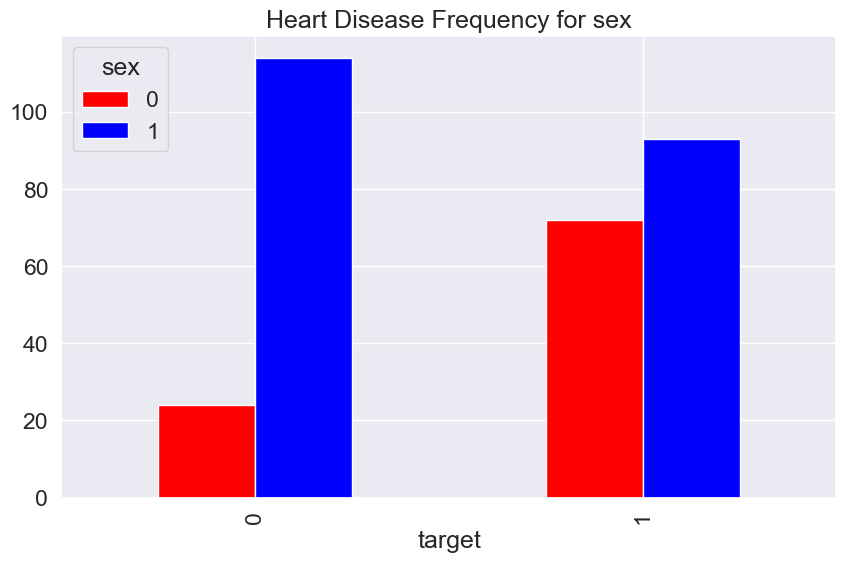

In [142]:
#create a plot of cross tab
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                   figsize=(10,6),
                                   color=["red","blue"])

plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = NO disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

### Age vs Max heart disease for Heart Disease

TypeError: 'str' object is not callable

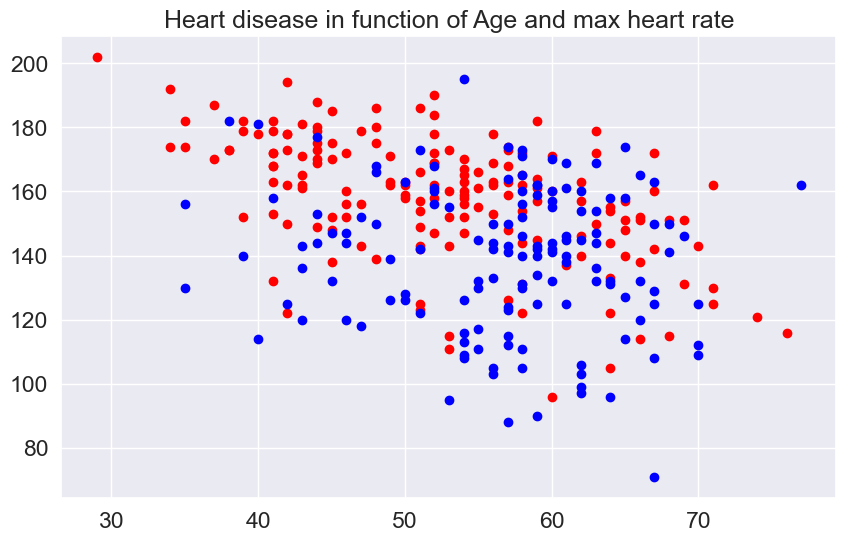

In [143]:
# Create another figure
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="red")

#Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="blue")

# Add some helpful info
plt.title("Heart disease in function of Age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])

In [ ]:
# Check the distribution of the age with help of histogram

df.age.plot.hist()

### Heart Disease Frequency per Chest Pain Type

3. cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
*  1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [ ]:
pd.crosstab(df.cp, df.target)

TypeError: 'str' object is not callable

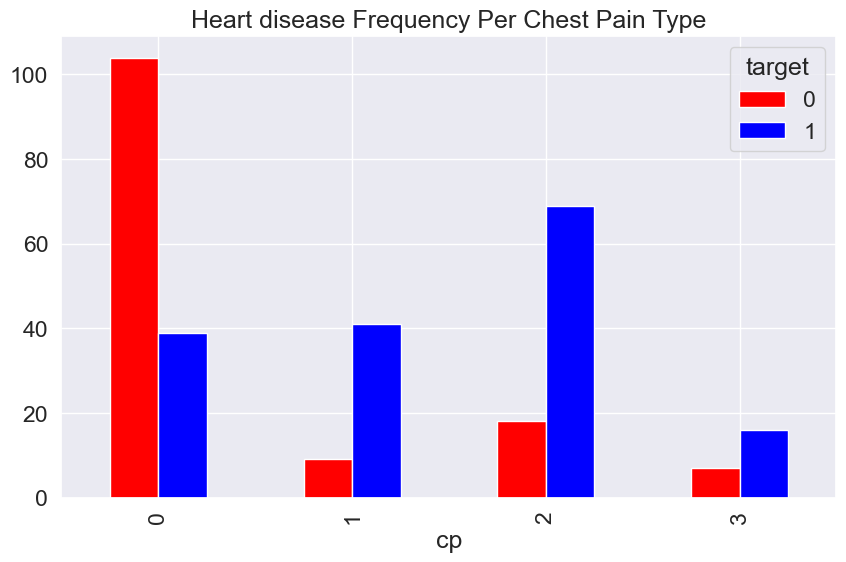

In [144]:
# make cross tab visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["red","blue"])

#add some communication
plt.title("Heart disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)

In [161]:
# Make a correlation matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [ ]:
# Let's make our correlation matrix a little prettier

# Assuming df is your DataFrame
corr_matrix = df.corr()

# Create a figure and axis for the heatmap
fig, ax = plt.subplots(figsize=(15, 10))

# Draw the heatmap
ax = sns.heatmap(corr_matrix,
                 annot=True,         # Annotate cells with the correlation coefficients
                 linewidths=0.5,      # Set the linewidth for the grid lines
                 fmt=".2f",           # Format the annotation to 2 decimal places
                 cmap="YlGnBu")       # Set the colormap to 'YlGnBu'

# Adjust the axis limits to prevent the heatmap from being cut off
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## 5. Modelling

In [ ]:
# Split the data in x and y

x=df.drop("target", axis=1)
y= df["target"]

In [ ]:
x

In [145]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [146]:
#Split data into train and test test sets
np.random.seed(42)

#Split into train and test set
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)



In [147]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [148]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [149]:
# Put the models in a dictionary
models={"Logistics Regression": LogisticRegression(),
       "KNN": KNeighborsClassifier(),
       "Random Forest": RandomForestClassifier()}

# Create a function to fit and score model 
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    #set random seed
    np.random.seed(42)
    #make a dictionary to keep model scores
    model_score={}
    #Loop through the models
    for name,model in models.items():
        #fit the model
        model.fit(x_train,y_train)
        #Evaluate the model and append its score to model_score
        model_score[name] =model.score(x_test,y_test)
        
    return model_score

In [150]:
model_scores=fit_and_score(models=models,
                         x_train=x_train,
                          x_test=x_test,
                         y_train=y_train,
                         y_test=y_test)

model_scores

C:\Users\shekh\desktop\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistics Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### MOdel Comparision

<Axes: >

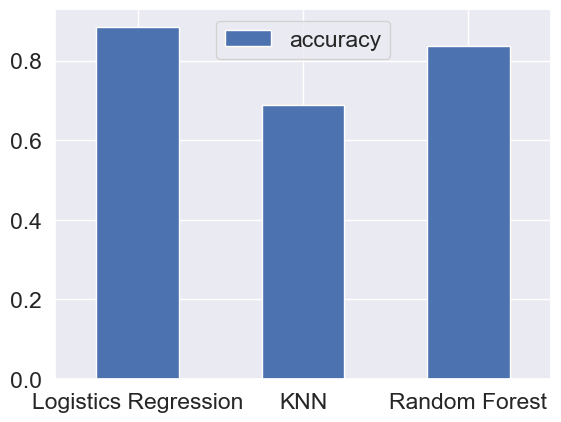

In [151]:
model_compare= pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(rot=0)

Now we've got a baseline model ... and we know a model's first
predictions aren't always what we should based our next steps off.
What should do?

Let's look at the following:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameters tuning(by hand)

In [152]:
#Let's tune 

train_score=[]
test_score=[]

# Create a list of differerent n_neighbors
neighbors =range(1,21)

#Setup KNN instances
knn= KNeighborsClassifier()

#Loop therough different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    #fit the algorithmn
    knn.fit(x_train,y_train)

    #Update the training score list
    train_score.append(knn.score(x_train,y_train))

    #Update the test scores
    test_score.append(knn.score(x_test,y_test))

In [153]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [154]:
test_score


[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

TypeError: 'str' object is not callable

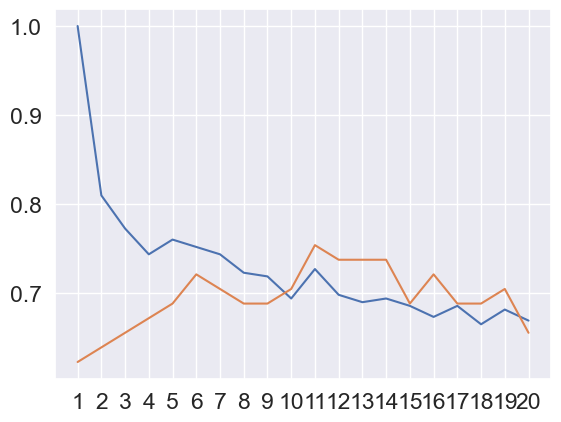

In [155]:
plt.plot(neighbors,train_score,label="TRain Score")
plt.plot(neighbors,test_score,label="Test Score")
plt.xticks(range(1,21,1))
plt.xlabel("Number Of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNNN score on the test data: {max(test_score)*100:.2f}% ")

### Hyperparameter tuning with RandomizedSearchCV

We are going to tune:
* LogisticRegression()
* RandomForestCalssifier()

.... using RandomizedSearchCv

In [162]:
#Create a hyperparameter grid for the LogisticRegression
log_reg_grid={"C": np.logspace(-4,4,20),
            "solver": ["liblinear"]}

#Create a hyperparameter grid for RandomForestClassifer
rf_grid={"n_estimators": np.arange(10,1000,50),
        "max_depth": [None,3,5,10],
        "min_samples_split": np.arange(2,20,2),
        "min_samples_leaf": np.arange(1,20,2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using
RandomizedSearchCV ...

In [164]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions =log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [160]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [156]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [157]:
# Tune RandomForestClassifier

np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions =rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [158]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [159]:
rs_rf.score(x_test,y_test)

0.8688524590163934

In [165]:
model_scores

{'Logistics Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Hyper parametrer tuning using GridSearchCv

Since our logisticRegression provide the best scores so far, we will try to improve that using GridSearchCv 

In [166]:
from sklearn.model_selection import GridSearchCV

# Different hyperparameter for our LogisticRegressionModel
log_reg_grid={"C": np.logspace(-4,4,30),
             "solver": ["liblinear"]}

#Setup grid hyperparameter search for LogisticRegression
gs_log_reg=GridSearchCV(LogisticRegression(),
                      param_grid=log_reg_grid,
                      cv=5,
                      verbose=True)

#Fit grid hyperparameteres search models
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [167]:
#Check the best hyperparameteres
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [168]:
#Evaluate the grid serach LogisticRegression model
gs_log_reg.score(x_test,y_test)

0.8852459016393442

In [169]:
# make predictions with the tuned models
y_preds= gs_log_reg.predict(x_test)

In [170]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [171]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation

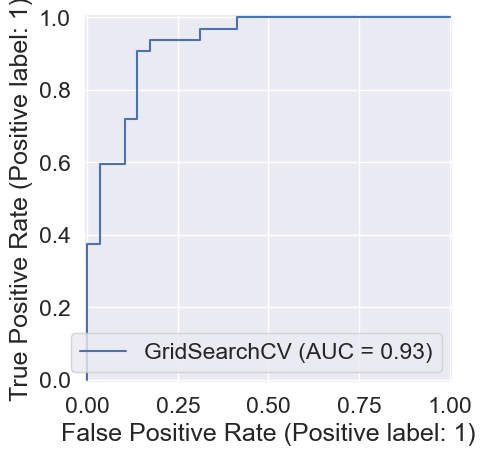

In [172]:
# Plot ROC curev and calculate AUC score
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)

In [173]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


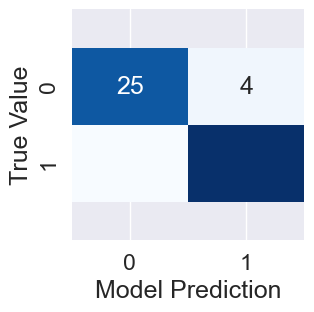

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()

    [[25  4]
     [ 3 29]]
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    sns.heatmap(confusion_matrix(y_test, y_preds),
                annot=True,
                cbar=False,
                fmt='d',
                cmap='Blues',
                ax=ax)

    ax.set_xlabel("Model Prediction")
    ax.set_ylabel("True Value")

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

# Example usage:
plot_conf_mat(y_test, y_preds)


In [175]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy | precision, recall and f1-score of
our model using cross-validation and to do so we'll be using
`cross_val_score()`.

In [176]:
#Chect the bes parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [177]:
#Create a new classsifer with the best parameters
clf=LogisticRegression(C=0.20433597178569418,
                      solver="liblinear")

In [179]:
#Cross-validated accuracy
cv_acc=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [180]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [183]:
#cross-validated precison
cv_pre=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="precision")
cv_pre=np.mean(cv_acc)
cv_pre

0.8446994535519124

In [186]:
#cross-validated recall
cv_recall=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [187]:
#cross-validated 
cv_f1=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

<Axes: title={'center': 'Cross-validated classification metrics'}>

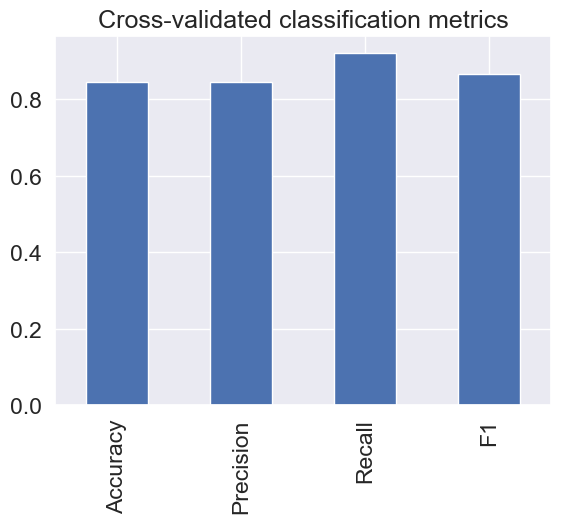

In [189]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
"Precision": cv_pre,
"Recall": cv_recall,
"F1": cv_f1},
index=[0])

cv_metrics. T.plot.bar (title="Cross-validated classification metrics",
                        legend=False)

### Feature Importance

Feature importance is another as asking, "which features contributed
most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning
model. One way to find feature importance is to search for "(MODEL
NAME) feature importance".

Let's find the feature importance for our LogisticRegression model ...

In [192]:
#Fit an instance of LogisticRegression
clf=LogisticRegression(C=0.20433597178569418,
                      solver="liblinear")

clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [193]:
#Chechk coef_
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [196]:
#Match coef's of features to column
'''
How much each feature contribute in getting the target
'''
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

<Axes: title={'center': 'Feature Importance'}>

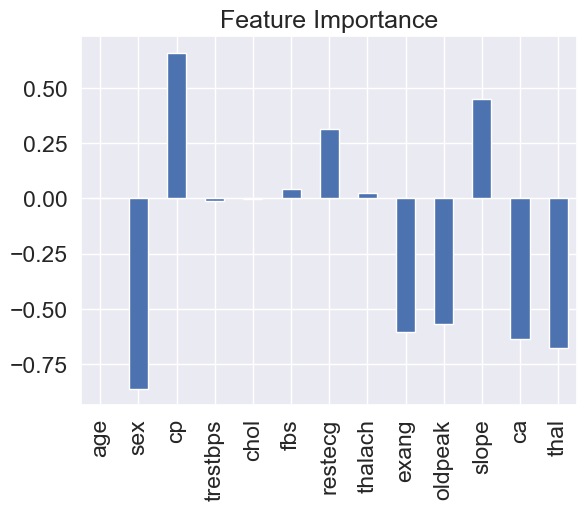

In [197]:
# vsualize the faeture importance
feature_df=pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

In [198]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [199]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment
    0. Upsloping: better heart rate with excercise (uncommon)
    1. Flatsloping: minimal change (typical healthy heart)
    2. Downslopins: signs of unhealthy heart

## 6. Experimentation
If you haven't hit your evaluation metric yet ... ask yourself ...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so
    far)
* If your model is good enough (you have hit your evaluation metric)
    how would you export it and share it with others?